## Install needed libraries

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Chuyên đề nghiên cứu 1/vnquant_package"
%cd {path}
!ls

In [ ]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

In [ ]:
%cd ..
!rm -rf vnquant
!ls

In [ ]:
!pip freeze | grep vnquant

vnquant==0.1.1


In [ ]:
import vnquant
vnquant.__version__

'0.1.1'

## Import libraries to visualize data

In [ ]:
import vnquant.data as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## We choose 10 codes from biggest companies on stock exchange in Vietnam

In [ ]:
stock_symbols = ['VIC', 'VCB', 'VNM', 'GAS', 'HVN', 'MWG', 'FPT', 'HPG', 'MSN', 'SAB']

## Initialize datasets of companies

In [ ]:
stock_data = {}

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2014-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  stock_data[symbol] = df.download()

In [ ]:
stock_data[stock_symbols[6]].head()

Attributes,high,low,open,close,avg,volume
Symbols,FPT,FPT,FPT,FPT,FPT,FPT
date,,,,,,
2014-01-02,47.8,47.2,47.6,47.4,47.55,207470.0
2014-01-03,47.4,47.0,47.3,47.3,47.22,165110.0
2014-01-06,48.0,47.0,47.3,48.0,47.36,301670.0
2014-01-07,48.0,47.5,48.0,47.5,47.79,290990.0
2014-01-08,48.0,47.4,47.4,47.8,47.80,129600.0


In [ ]:
stock_data[stock_symbols[2]].tail()

Attributes,high,low,open,close,avg,volume
Symbols,VNM,VNM,VNM,VNM,VNM,VNM
date,,,,,,
2023-12-25,68.7,67.6,67.6,67.9,68.40,2672700.0
2023-12-26,68.5,68.0,68.3,68.0,68.31,1975400.0
2023-12-27,68.2,67.5,68.0,67.5,67.81,1736400.0
2023-12-28,68.5,67.5,67.5,68.5,68.17,2873700.0
2023-12-29,68.7,67.6,68.7,67.6,68.11,2257800.0


## Explore and visualize the datasets

In [ ]:
stock_data

{'VIC': Attributes   high    low   open  close    avg     volume
 Symbols       VIC    VIC    VIC    VIC    VIC        VIC
 date                                                    
 2014-01-02  70.50  69.50  70.00  70.00  69.92    74950.0
 2014-01-03  70.50  69.50  70.00  70.50  70.00    91920.0
 2014-01-06  70.50  69.50  70.50  70.50  70.11   111760.0
 2014-01-07  70.50  70.00  70.50  70.50  70.47   294120.0
 2014-01-08  70.50  70.00  70.00  70.00  70.02   109890.0
 ...           ...    ...    ...    ...    ...        ...
 2023-12-25  43.55  43.00  43.10  43.40  43.34  3364500.0
 2023-12-26  43.75  43.35  43.40  43.55  43.55  1806700.0
 2023-12-27  43.95  43.60  43.65  43.60  43.76  1920500.0
 2023-12-28  44.60  43.60  43.60  44.45  44.32  4359700.0
 2023-12-29  44.85  44.45  44.65  44.60  44.63  2474300.0
 
 [2494 rows x 6 columns],
 'VCB': Attributes  high   low  open close    avg     volume
 Symbols      VCB   VCB   VCB   VCB    VCB        VCB
 date                                 

In [ ]:
stock_data[stock_symbols[7]].index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='date', length=2494, freq=None)

In [ ]:
stock_data[stock_symbols[5]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2368 entries, 2014-07-14 to 2023-12-29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (high, MWG)    2368 non-null   float64
 1   (low, MWG)     2368 non-null   float64
 2   (open, MWG)    2368 non-null   float64
 3   (close, MWG)   2368 non-null   float64
 4   (avg, MWG)     2368 non-null   float64
 5   (volume, MWG)  2368 non-null   float64
dtypes: float64(6)
memory usage: 129.5 KB


In [ ]:
stock_data[stock_symbols[1]].describe()

Attributes,high,low,open,close,avg,volume
Symbols,VCB,VCB,VCB,VCB,VCB,VCB
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2.494000e+03
mean,64.697253,63.161167,63.906736,63.955994,63.927551,1.191517e+06
std,24.395285,23.858451,24.153036,24.163703,24.123859,8.213166e+05
min,24.300000,23.500000,23.800000,23.800000,23.910000,3.638000e+04
25%,40.600000,39.625000,40.000000,40.100000,40.170000,6.474900e+05
50%,65.650000,63.250000,64.550000,64.400000,64.340000,9.974350e+05
75%,86.000000,84.800000,85.400000,85.375000,85.427500,1.507352e+06
max,117.200000,115.000000,116.700000,116.400000,116.120000,7.265480e+06


In [ ]:
stock_data[stock_symbols[0]]['close'].value_counts()

VIC   
42.00     31
52.00     28
78.00     21
53.50     20
42.80     20
          ..
83.10      1
82.90      1
40.05      1
82.30      1
144.00     1
Length: 726, dtype: int64

In [ ]:
stock_data[stock_symbols[3]].corr()

,Attributes,high,low,open,close,avg,volume
,Symbols,GAS,GAS,GAS,GAS,GAS,GAS
Attributes,Symbols,,,,,,
high,GAS,1.000000,0.997870,0.998385,0.998469,0.999364,0.091709
low,GAS,0.997870,1.000000,0.998482,0.998186,0.999234,0.062773
open,GAS,0.998385,0.998482,1.000000,0.996625,0.998662,0.072171
close,GAS,0.998469,0.998186,0.996625,1.000000,0.999014,0.080967
avg,GAS,0.999364,0.999234,0.998662,0.999014,1.000000,0.078836
volume,GAS,0.091709,0.062773,0.072171,0.080967,0.078836,1.000000


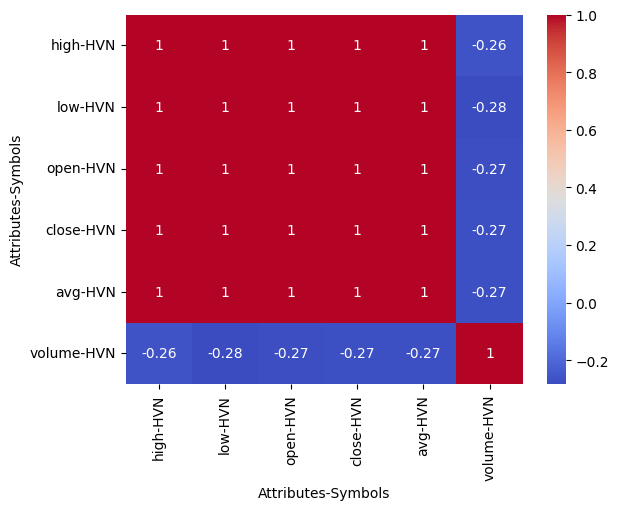

In [ ]:
sns.heatmap(stock_data[stock_symbols[4]].corr(), annot=True, cmap='coolwarm')
plt.show()

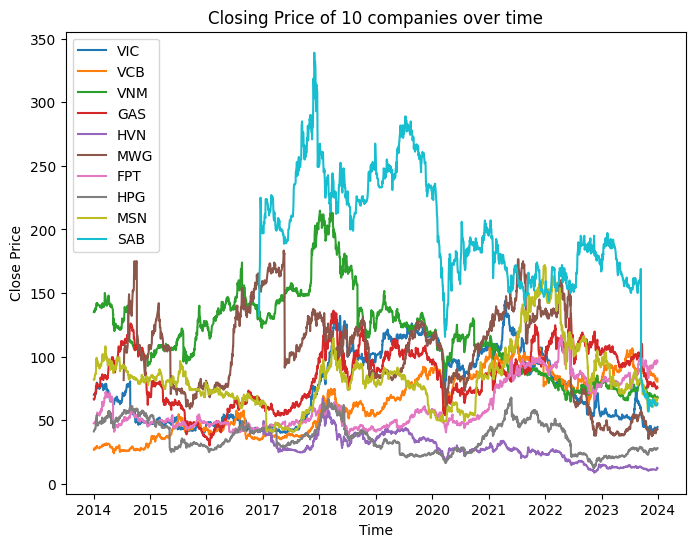

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Closing Price of 10 companies over time")

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2014-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  plt.plot(df.index, df['close'], label=symbol)

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

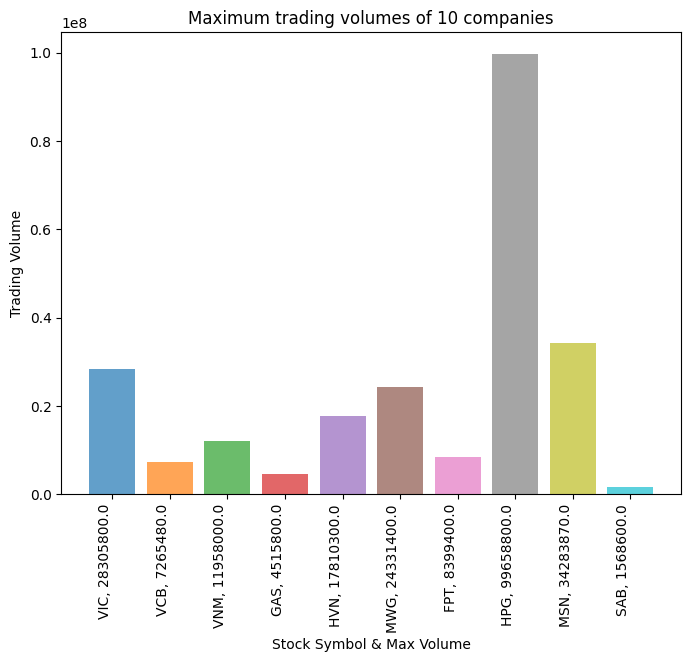

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Maximum trading volumes of 10 companies")

symbols = []
max_volumes = []

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2014-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  symbols.append(symbol)
  max_volume = df['volume'].max()
  max_volumes.append(f'{symbol}, {max_volume.item()}')
  plt.bar(symbol, max_volume.item(), alpha=0.7)

plt.xticks(symbols, max_volumes, rotation=90, ha='right')

plt.xlabel('Stock Symbol & Max Volume')
plt.ylabel('Trading Volume')
plt.show()

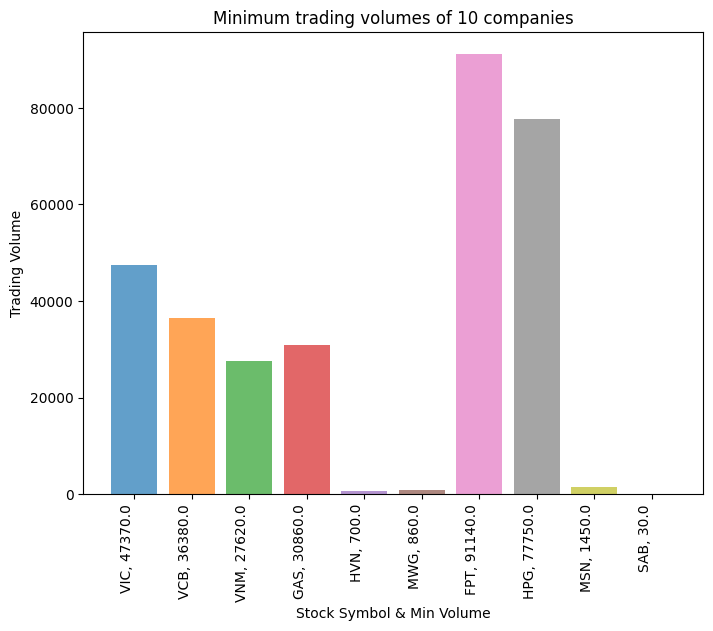

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Minimum trading volumes of 10 companies")

symbols = []
min_volumes = []

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2014-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  symbols.append(symbol)
  min_volume = df['volume'].min()
  min_volumes.append(f'{symbol}, {min_volume.item()}')
  plt.bar(symbol, min_volume.item(), alpha=0.7)

plt.xticks(symbols, min_volumes, rotation=90, ha='right')

plt.xlabel('Stock Symbol & Min Volume')
plt.ylabel('Trading Volume')
plt.show()

In [ ]:
stock_prices = pd.DataFrame({'open': [36, 56, 45, 29, 65, 66, 67],
                             'close': [29, 72, 11, 4, 23, 68, 45],
                             'high': [42, 73, 61, 62, 73, 56, 55],
                             'low': [22, 11, 10, 2, 13, 24, 25]},
                            index=pd.date_range(
                              "2021-11-10", periods=7, freq="d"))
up = stock_prices[stock_prices.close >= stock_prices.open]
up

,open,close,high,low
2021-11-11,56,72,73,11
2021-11-15,66,68,56,24


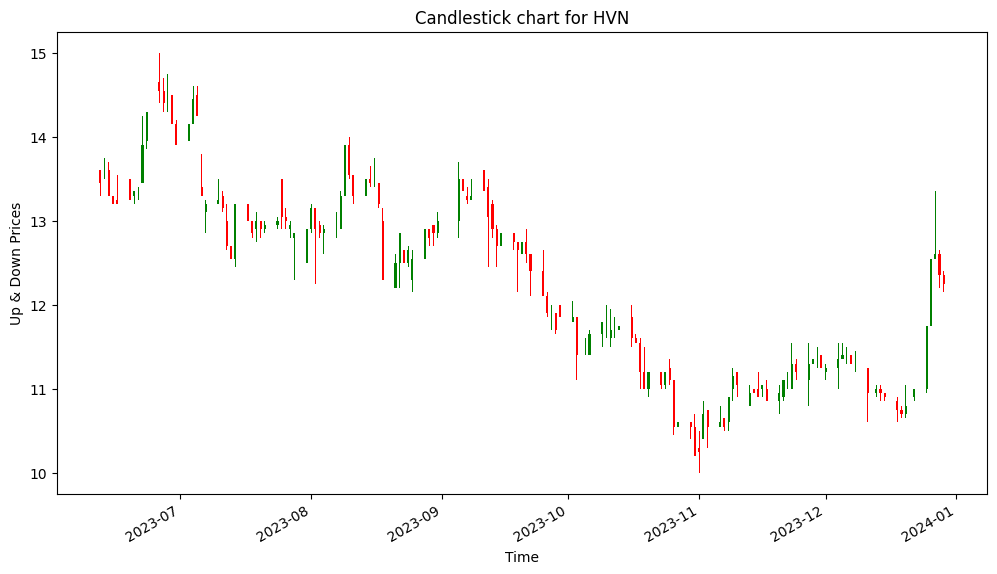

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"Candlestick chart for {stock_symbols[4]}")

stock_data_candlestick = stock_data[stock_symbols[4]][1600:]

up = stock_data_candlestick[stock_data_candlestick[('close', f'{stock_symbols[4]}')] >= stock_data_candlestick[('open', f'{stock_symbols[4]}')]]
down = stock_data_candlestick[stock_data_candlestick[('close', f'{stock_symbols[4]}')] < stock_data_candlestick[('open', f'{stock_symbols[4]}')]]

plt.bar(up.index, up[('close', f'{stock_symbols[4]}')]-up[('open', f'{stock_symbols[4]}')], width=0.5, bottom=up[('open', f'{stock_symbols[4]}')], color='green')
plt.bar(up.index, up[('high', f'{stock_symbols[4]}')]-up[('close', f'{stock_symbols[4]}')], width=0.2, bottom=up[('close', f'{stock_symbols[4]}')], color='green')
plt.bar(up.index, up[('low', f'{stock_symbols[4]}')]-up[('open', f'{stock_symbols[4]}')], width=0.2, bottom=up[('open', f'{stock_symbols[4]}')], color='green')

plt.bar(down.index, down[('close', f'{stock_symbols[4]}')]-down[('open', f'{stock_symbols[4]}')], width=0.5, bottom=down[('open', f'{stock_symbols[4]}')], color='red')
plt.bar(down.index, down[('high', f'{stock_symbols[4]}')]-down[('open', f'{stock_symbols[4]}')], width=0.2, bottom=down[('open', f'{stock_symbols[4]}')], color='red')
plt.bar(down.index, down[('low', f'{stock_symbols[4]}')]-down[('close', f'{stock_symbols[4]}')], width=0.2, bottom=down[('close', f'{stock_symbols[4]}')], color='red')

plt.xticks(rotation=30, ha='right')

plt.xlabel('Time')
plt.ylabel('Up & Down Prices')
plt.show()

In [ ]:
number_of_days = 30

stock_data[stock_symbols[9]]['sma30'] = stock_data[stock_symbols[9]]['close'].rolling(window=number_of_days).mean()
stock_data[stock_symbols[9]]['ema30'] = stock_data[stock_symbols[9]]['close'].ewm(span=number_of_days).mean()

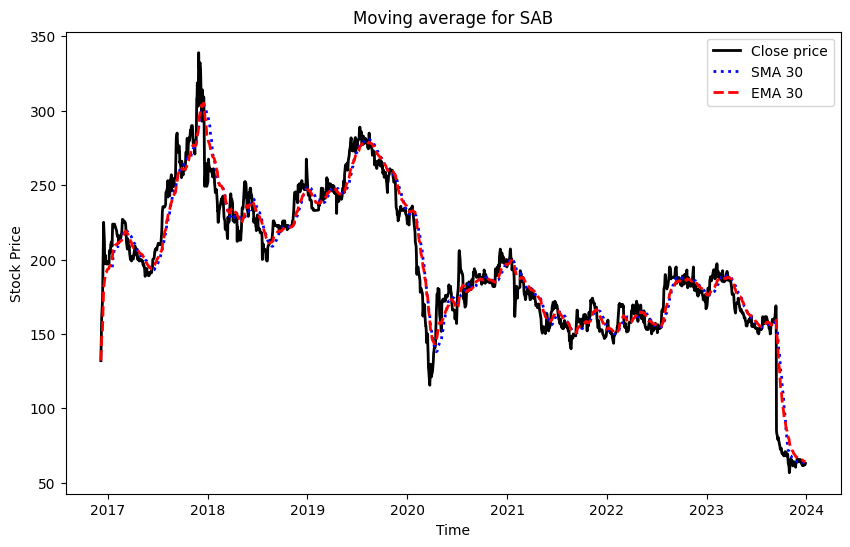

In [ ]:
plt.figure(figsize=(10,6))
plt.title(f"Moving average for {stock_symbols[9]}")

plt.plot(stock_data[stock_symbols[9]].index, stock_data[stock_symbols[9]]['close'], label='Close price', color='black', linewidth=2)

plt.plot(stock_data[stock_symbols[9]].index, stock_data[stock_symbols[9]]['sma30'], label=f'SMA {number_of_days}', color='blue', linestyle='dotted', linewidth=2)
plt.plot(stock_data[stock_symbols[9]].index, stock_data[stock_symbols[9]]['ema30'], label=f'EMA {number_of_days}', color='red', linestyle='dashed', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
stock_data[stock_symbols[4]]['sma30'] = stock_data[stock_symbols[4]]['close'].rolling(window=number_of_days).mean()
stock_data[stock_symbols[4]]['ema30'] = stock_data[stock_symbols[4]]['close'].ewm(span=number_of_days).mean()

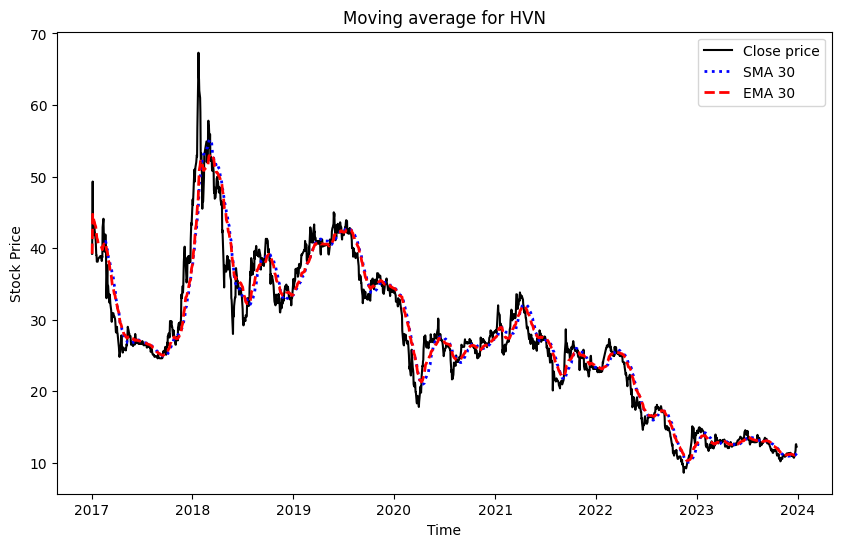

In [ ]:
plt.figure(figsize=(10,6))
plt.title(f"Moving average for {stock_symbols[4]}")

plt.plot(stock_data[stock_symbols[4]].index, stock_data[stock_symbols[4]]['close'], label='Close price', color='black')

plt.plot(stock_data[stock_symbols[4]].index, stock_data[stock_symbols[4]]['sma30'], label=f'SMA {number_of_days}', color='blue', linestyle='dotted', linewidth=2)
plt.plot(stock_data[stock_symbols[4]].index, stock_data[stock_symbols[4]]['ema30'], label=f'EMA {number_of_days}', color='red', linestyle='dashed', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
number_of_days = 20

stock_data[stock_symbols[6]]['sma20'] = stock_data[stock_symbols[6]]['close'].rolling(window=number_of_days).mean()
stock_data[stock_symbols[6]]['sma20_std'] = stock_data[stock_symbols[6]]['close'].rolling(window=number_of_days).std()

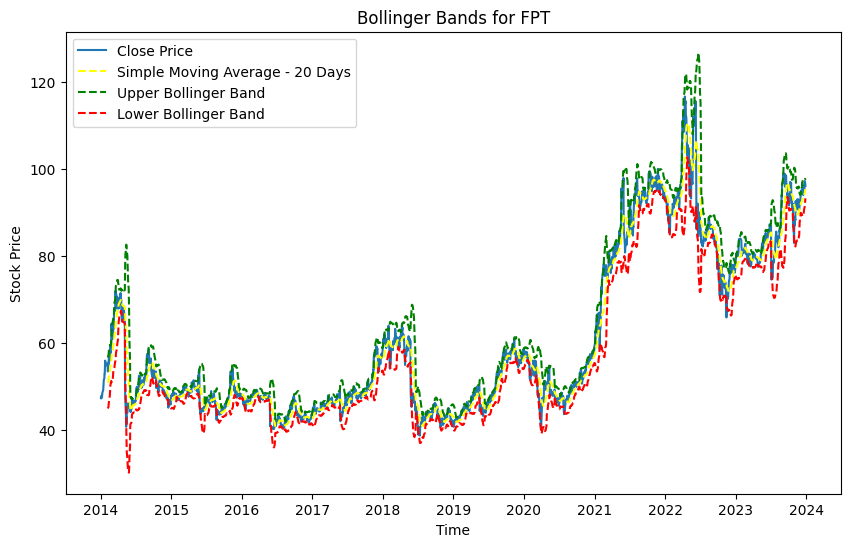

In [ ]:
stock_data[stock_symbols[6]]['upper_bb'] = stock_data[stock_symbols[6]]['sma20'] + 2 * stock_data[stock_symbols[6]]['sma20_std']
stock_data[stock_symbols[6]]['lower_bb'] = stock_data[stock_symbols[6]]['sma20'] - 2 * stock_data[stock_symbols[6]]['sma20_std']

plt.figure(figsize=(10,6))
plt.title(f"Bollinger Bands for {stock_symbols[6]}")

plt.plot(stock_data[stock_symbols[6]]['close'], label='Close Price')
plt.plot(stock_data[stock_symbols[6]]['sma20'], label='Simple Moving Average - 20 Days', linestyle='dashed', color='yellow')
plt.plot(stock_data[stock_symbols[6]]['upper_bb'], label='Upper Bollinger Band',linestyle='dashed', color='green')
plt.plot(stock_data[stock_symbols[6]]['lower_bb'], label='Lower Bollinger Band',linestyle='dashed', color='red')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
number_of_days = 20

stock_data[stock_symbols[2]]['sma20'] = stock_data[stock_symbols[2]]['close'].rolling(window=number_of_days).mean()
stock_data[stock_symbols[2]]['sma20_std'] = stock_data[stock_symbols[2]]['close'].rolling(window=number_of_days).std()

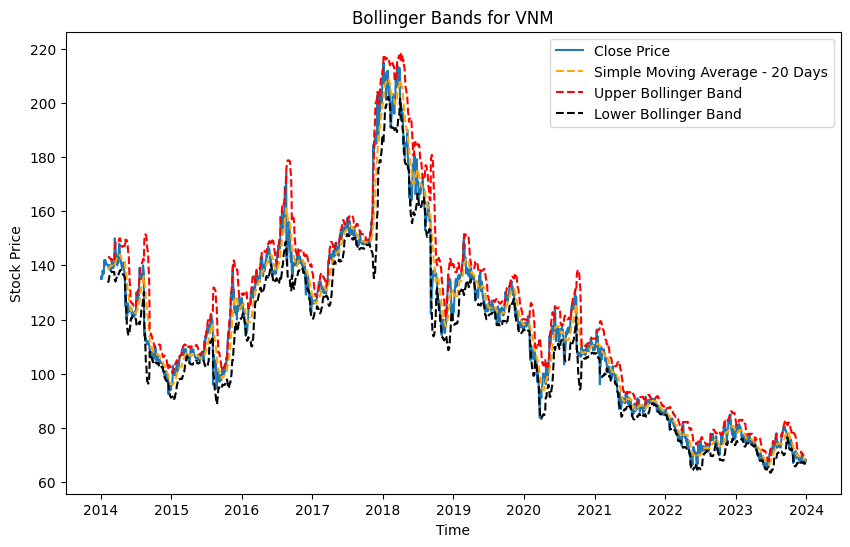

In [ ]:
stock_data[stock_symbols[2]]['upper_bb'] = stock_data[stock_symbols[2]]['sma20'] + 2 * stock_data[stock_symbols[2]]['sma20_std']
stock_data[stock_symbols[2]]['lower_bb'] = stock_data[stock_symbols[2]]['sma20'] - 2 * stock_data[stock_symbols[2]]['sma20_std']

plt.figure(figsize=(10,6))
plt.title(f"Bollinger Bands for {stock_symbols[2]}")

plt.plot(stock_data[stock_symbols[2]]['close'], label='Close Price')
plt.plot(stock_data[stock_symbols[2]]['sma20'], label='Simple Moving Average - 20 Days', linestyle='dashed', color='orange')
plt.plot(stock_data[stock_symbols[2]]['upper_bb'], label='Upper Bollinger Band',linestyle='dashed', color='red')
plt.plot(stock_data[stock_symbols[2]]['lower_bb'], label='Lower Bollinger Band',linestyle='dashed', color='black')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
max_number_of_days = 30
min_number_of_days = 15
signal = 10

stock_data[stock_symbols[3]]['longema'] = stock_data[stock_symbols[3]]['close'].ewm(span=max_number_of_days).mean()
stock_data[stock_symbols[3]]['shortema'] = stock_data[stock_symbols[3]]['close'].ewm(span=min_number_of_days).mean()

stock_data[stock_symbols[3]]['macd'] = stock_data[stock_symbols[3]]['shortema'] - stock_data[stock_symbols[3]]['longema']
stock_data[stock_symbols[3]]['signal'] = stock_data[stock_symbols[3]]['macd'].ewm(span=signal).mean()

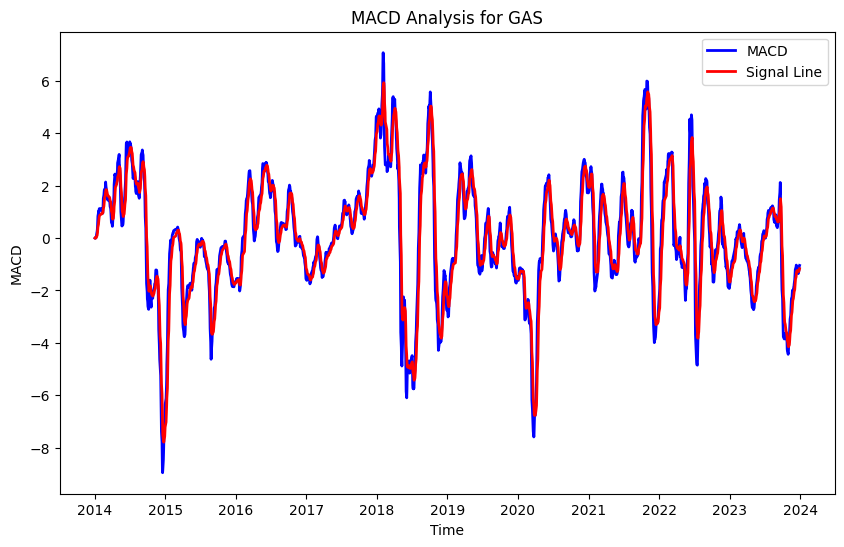

In [ ]:
plt.figure(figsize=(10,6))
plt.title(f"MACD Analysis for {stock_symbols[3]}")

plt.plot(stock_data[stock_symbols[3]].index, stock_data[stock_symbols[3]]['macd'], label='MACD', color='blue', linewidth=2)
plt.plot(stock_data[stock_symbols[3]].index, stock_data[stock_symbols[3]]['signal'], label='Signal Line', color='red', linewidth=2)

plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend()
plt.show()

In [ ]:
max_number_of_days = 30
min_number_of_days = 15
signal = 10

stock_data[stock_symbols[6]]['longema'] = stock_data[stock_symbols[6]]['close'].ewm(span=max_number_of_days).mean()
stock_data[stock_symbols[6]]['shortema'] = stock_data[stock_symbols[6]]['close'].ewm(span=min_number_of_days).mean()

stock_data[stock_symbols[6]]['macd'] = stock_data[stock_symbols[6]]['shortema'] - stock_data[stock_symbols[3]]['longema']
stock_data[stock_symbols[6]]['signal'] = stock_data[stock_symbols[6]]['macd'].ewm(span=signal).mean()

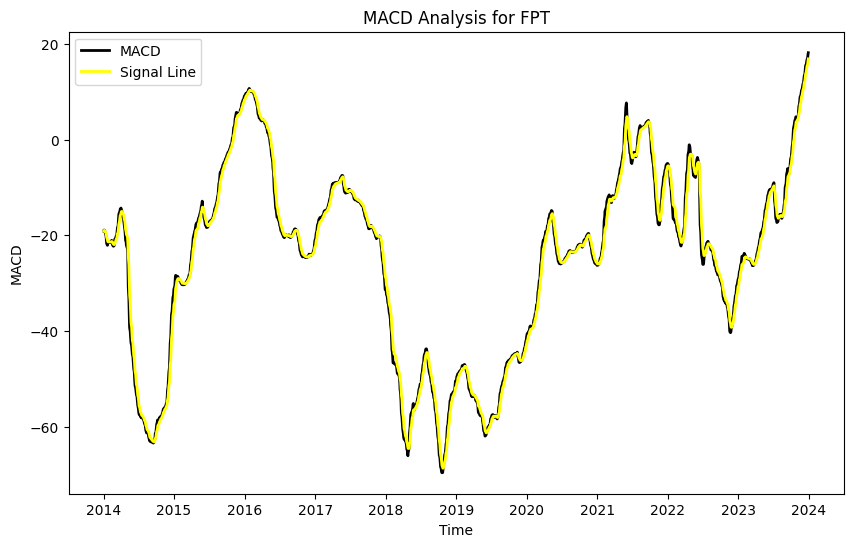

In [ ]:
plt.figure(figsize=(10,6))
plt.title(f"MACD Analysis for {stock_symbols[6]}")

plt.plot(stock_data[stock_symbols[6]].index, stock_data[stock_symbols[6]]['macd'], label='MACD', color='black', linewidth=2)
plt.plot(stock_data[stock_symbols[6]].index, stock_data[stock_symbols[6]]['signal'], label='Signal Line', color='yellow', linewidth=2)

plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend()
plt.show()

In [ ]:
rsi_days = 15

delta = stock_data[stock_symbols[7]]['close'].diff(1)
up = delta.where(delta > 0, 0)
down = -delta.where(delta < 0, 0)

avg_up = up.rolling(window=rsi_days, min_periods=1).mean()
avg_down = down.rolling(window=rsi_days, min_periods=1).mean()

rs = avg_up/avg_down

stock_data[stock_symbols[7]]['rsi'] = 100 - (100 / (1 + rs))

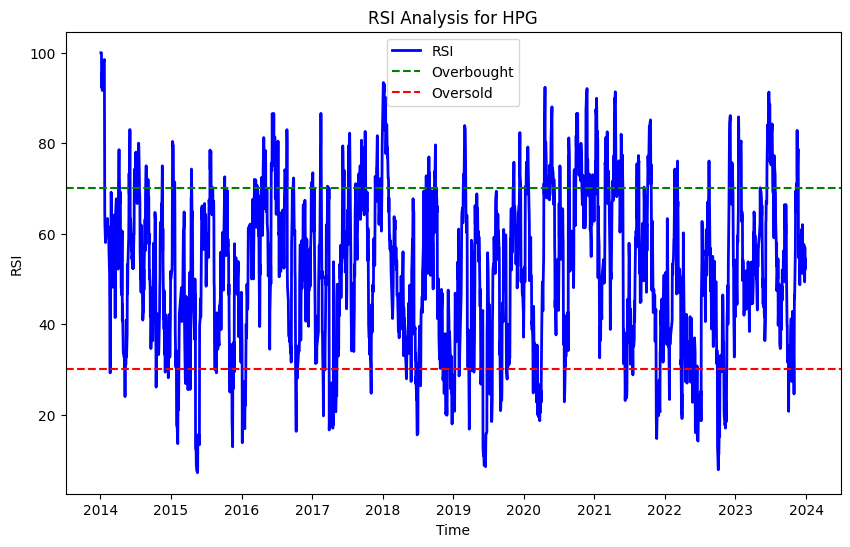

In [ ]:
plt.figure(figsize=(10,6))
plt.title(f"RSI Analysis for {stock_symbols[7]}")

plt.plot(stock_data[stock_symbols[7]].index, stock_data[stock_symbols[7]]['rsi'], label='RSI', color='blue', linewidth=2)
plt.axhline(y = 70, color ='green', label='Overbought', linestyle ='dashed')
plt.axhline(y = 30, color ='red', label='Oversold', linestyle ='dashed')

plt.xlabel('Time')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [ ]:
rsi_days = 15

delta = stock_data[stock_symbols[8]]['close'].diff(1)
up = delta.where(delta > 0, 0)
down = -delta.where(delta < 0, 0)

avg_up = up.rolling(window=rsi_days, min_periods=1).mean()
avg_down = down.rolling(window=rsi_days, min_periods=1).mean()

rs = avg_up/avg_down

stock_data[stock_symbols[8]]['rsi'] = 100 - (100 / (1 + rs))

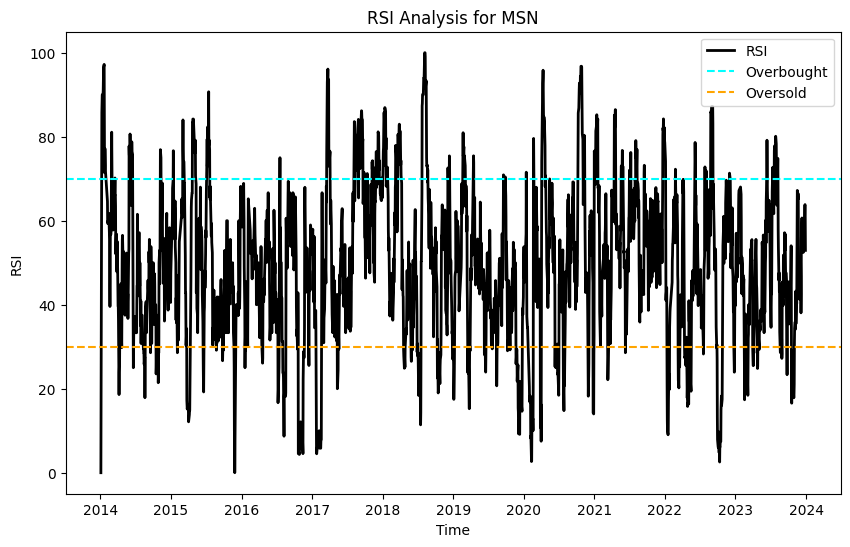

In [ ]:
plt.figure(figsize=(10,6))
plt.title(f"RSI Analysis for {stock_symbols[8]}")

plt.plot(stock_data[stock_symbols[8]].index, stock_data[stock_symbols[8]]['rsi'], label='RSI', color='black', linewidth=2)
plt.axhline(y = 70, color ='cyan', label='Overbought', linestyle ='dashed')
plt.axhline(y = 30, color ='orange', label='Oversold', linestyle ='dashed')

plt.xlabel('Time')
plt.ylabel('RSI')
plt.legend()
plt.show()

## THE END